In [102]:
import pandas as pd
import numpy as np

In [103]:
column_names = ["user_id", "item_id", "rating", "timestamp"]

In [104]:
df = pd.read_csv("u.data", sep="\t", names=column_names)

In [105]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [106]:
movie_titles_df = pd.read_csv("Movie_Id_Titles")

In [107]:
import re

def extract_year(title: str) -> int:
    match = re.search(r"\A.+\((?P<year>\d{4})\).*\Z", title.strip())

    if match:
        return int(match.group("year"))

def decade(year: int):
    if np.isnan(year):
        return np.nan

    return round(year/10)*10

movie_titles_df["year"] = movie_titles_df["title"].apply(extract_year)
movie_titles_df["decade"] = movie_titles_df["year"].apply(decade)
movie_titles_df.dropna(inplace=True)

In [108]:
movie_titles_df

,item_id,title,year,decade
0,1,Toy Story (1995),1995.0,2000.0
1,2,GoldenEye (1995),1995.0,2000.0
2,3,Four Rooms (1995),1995.0,2000.0
3,4,Get Shorty (1995),1995.0,2000.0
4,5,Copycat (1995),1995.0,2000.0
...,...,...,...,...
1677,1678,Mat' i syn (1997),1997.0,2000.0
1678,1679,B. Monkey (1998),1998.0,2000.0
1679,1680,Sliding Doors (1998),1998.0,2000.0
1680,1681,You So Crazy (1994),1994.0,1990.0


In [109]:
df = pd.merge(df, movie_titles_df, how="inner", on="item_id")

In [110]:
df

,user_id,item_id,rating,timestamp,title,year,decade
0,0,50,5,881250949,Star Wars (1977),1977.0,1980.0
1,290,50,5,880473582,Star Wars (1977),1977.0,1980.0
2,79,50,4,891271545,Star Wars (1977),1977.0,1980.0
3,2,50,5,888552084,Star Wars (1977),1977.0,1980.0
4,8,50,5,879362124,Star Wars (1977),1977.0,1980.0
...,...,...,...,...,...,...,...
99989,840,1674,4,891211682,Mamma Roma (1962),1962.0,1960.0
99990,655,1640,3,888474646,"Eighth Day, The (1996)",1996.0,2000.0
99991,655,1637,3,888984255,Girls Town (1996),1996.0,2000.0
99992,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",1994.0,1990.0


In [111]:
df.groupby("title")["rating"].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Star Kid (1997)                               5.0
Prefontaine (1997)                            5.0
Aiqing wansui (1994)                          5.0
Santa with Muscles (1996)                     5.0
                                             ... 
The Courtyard (1995)                          1.0
Baton Rouge (1988)                            1.0
Mille bolle blu (1993)                        1.0
Stefano Quantestorie (1993)                   1.0
Power 98 (1995)                               1.0
Name: rating, Length: 1663, dtype: float64

<AxesSubplot:>

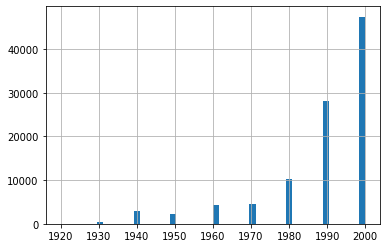

In [115]:
df["decade"].hist(bins=50)

In [112]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())

In [113]:
ratings["num_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

<AxesSubplot:>

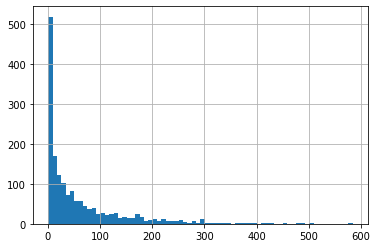

In [114]:
ratings["num_ratings"].hist(bins=70)

<AxesSubplot:>

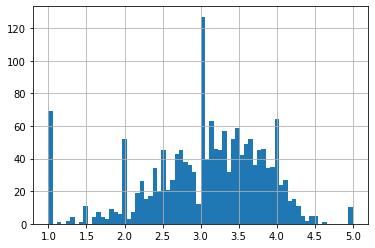

In [116]:
ratings["rating"].hist(bins=70)

In [117]:
movie_matrix = df.pivot_table(index="user_id", columns="title", values="rating")

In [118]:
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
ratings.sort_values("num_ratings", ascending=False)

,rating,num_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
Stefano Quantestorie (1993),1.000000,1
Good Morning (1971),1.000000,1


In [120]:
star_wars_ratings = movie_matrix["Star Wars (1977)"]
liar_liar_ratings = movie_matrix["Liar Liar (1997)"]

In [59]:
similar_to_star_wars = movie_matrix.corrwith(star_wars_ratings)

c:\users\faroo\.venv\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\users\faroo\.venv\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [63]:
similar_to_star_wars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [64]:
similar_to_liar_liar = movie_matrix.corrwith(liar_liar_ratings)

c:\users\faroo\.venv\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\users\faroo\.venv\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [65]:
similar_to_liar_liar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [68]:
corr_star_wars_df = pd.DataFrame(similar_to_star_wars, columns=["correlation"])
corr_star_wars_df.dropna(inplace=True)
corr_star_wars_df

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [69]:
corr_star_wars_df.sort_values("correlation", ascending=False)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [70]:
corr_star_wars_df = corr_star_wars_df.join(ratings["num_ratings"])
corr_star_wars_df

,correlation,num_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [71]:
corr_star_wars_df[corr_star_wars_df["num_ratings"] > 100].sort_values("correlation", ascending=False)

,correlation,num_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [72]:
movie_titles_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [98]:
movie_titles_df[movie_titles_df["year"].isna()]

,item_id,title,year,decade


In [99]:
movie_titles_df

,item_id,title,year,decade
0,1,Toy Story (1995),1995.0,2000.0
1,2,GoldenEye (1995),1995.0,2000.0
2,3,Four Rooms (1995),1995.0,2000.0
3,4,Get Shorty (1995),1995.0,2000.0
4,5,Copycat (1995),1995.0,2000.0
...,...,...,...,...
1677,1678,Mat' i syn (1997),1997.0,2000.0
1678,1679,B. Monkey (1998),1998.0,2000.0
1679,1680,Sliding Doors (1998),1998.0,2000.0
1680,1681,You So Crazy (1994),1994.0,1990.0


In [100]:
df = pd.merge(df, movie_titles_df, how="inner", on="item_id")

In [101]:
df

,user_id,item_id,rating,timestamp,title_x,title_y,year,decade
0,0,50,5,881250949,Star Wars (1977),Star Wars (1977),1977.0,1980.0
1,290,50,5,880473582,Star Wars (1977),Star Wars (1977),1977.0,1980.0
2,79,50,4,891271545,Star Wars (1977),Star Wars (1977),1977.0,1980.0
3,2,50,5,888552084,Star Wars (1977),Star Wars (1977),1977.0,1980.0
4,8,50,5,879362124,Star Wars (1977),Star Wars (1977),1977.0,1980.0
...,...,...,...,...,...,...,...,...
99989,840,1674,4,891211682,Mamma Roma (1962),Mamma Roma (1962),1962.0,1960.0
99990,655,1640,3,888474646,"Eighth Day, The (1996)","Eighth Day, The (1996)",1996.0,2000.0
99991,655,1637,3,888984255,Girls Town (1996),Girls Town (1996),1996.0,2000.0
99992,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...","Silence of the Palace, The (Saimt el Qusur) (1...",1994.0,1990.0
